In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plot
import os
import pandas as pd
from scipy import interpolate
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.debugger import set_trace
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.tri as mtri


pickledir='/home/kallanved/tracking/deeplabcut/'
os.chdir(pickledir)
fname="trial_ 15DeepCut_resnet50_ScoreMap2Jun20shuffle1_1030000includingmetadata.pickle"
import pickle
with open(fname, "rb") as input_file:
    e = pickle.load(input_file)
#scmaplocref=e['scmaplocref']
#scmaplocref.keys()
#scmaplocref=scmaplocref[3]
scmap=e['scmap']
locref=e['locref']


In [2]:
import scipy

In [2]:
scmap=np.asarray(scmap)
locref=np.asarray(locref)
scmap.shape
# size is frame #, etc
scmap[1,:,:,:].shape

(64, 192, 27)

In [7]:
c=np.arange(0,nx*ny-1,1)
a=np.tile(c,(num_joints,1))
a_=[]
for iz in range(frame_num):
    a_.append(a)
             
a=np.asarray(a_)


1.0

In [1]:
# Advice from charles:
# insert my code, compare
# go line by line and find where things change
# run this over a very simple video

In [12]:


LOCREF1=locref.reshape(frame_num,nx*ny,num_joints,2)
MAXLOC1=np.argmax(scmap.reshape(frame_num,nx*ny,num_joints),axis=1)
Y1,X1=np.unravel_index(MAXLOC1,dims=(ny,nx))
DZ1=np.zeros((frame_num,num_joints,3))
for l in range(frame_num):
    for k in range(num_joints):
        DZ1[l,k,:2]=LOCREF1[l,MAXLOC1[l,k],k,:]
        DZ1[l,k,2]=scmap[l,Y1[l,k],X1[l,k],k]
            
X1=X1.astype('float32')*8.0+.5*8.0+DZ1[:,:,0]
set_trace()
Y1=Y1.astype('float32')*8.0+.5*8.0+DZ1[:,:,1]
pose = np.empty((frame_num, num_joints*3), dtype=X.dtype)
pose[:,0::3] = X1
pose[:,1::3] = Y1
pose[:,2::3] = DZ1[:,:,2] #P
# hold pose and these in memory
pose.shape



--Return--
None
> <ipython-input-12-f3e2767ffd64>(13)<module>()
     11 
     12 X1=X1.astype('float32')*8.0+.5*8.0+DZ1[:,:,0]
---> 13 set_trace()
     14 Y1=Y1.astype('float32')*8.0+.5*8.0+DZ1[:,:,1]
     15 pose = np.empty((frame_num, num_joints*3), dtype=X.dtype)

ipdb> c


(259, 81)

In [13]:
# import the csv file
filename = 'trial_ 15DeepCut_resnet50_ScoreMap2Jun20shuffle1_1030000.h5'
df=pd.read_hdf(filename)
df.columns=df.columns.droplevel(0)
# positions inside df should match
# look at first array (Elbow1)
Wrist2=df.loc[:, df.columns.get_level_values(0).isin(['Elbow1'])]   #
#set_trace()
xwr=Wrist2['Elbow1','x'].copy()
ywr=Wrist2['Elbow1','y'].copy()
probwr=Wrist2['Elbow1','likelihood'].copy()

# now set up pose elements
xwr_scmap=pose[:,0]
ywr_scmap=pose[:,1]
probwr_scmap=pose[:,2]
xloss=[]
yloss=[]
scloss=[]
for i in range(frame_num):
    xloss.append(xwr_scmap[i]-xwr[i])
    yloss.append(ywr_scmap[i]-ywr[i])
    scloss.append(probwr_scmap[i]-probwr[i])

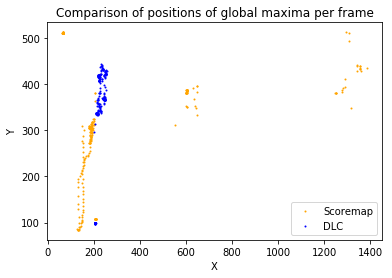

In [19]:
plt.scatter(xwr_scmap,ywr_scmap,c='orange',s=1,label='Scoremap')
#plt.hold()
plt.scatter(xwr,ywr,c='blue',s=1,label='DLC')
plt.legend()
plt.title('Comparison of positions of global maxima per frame')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Comparisons_positions.png')
plt.show()

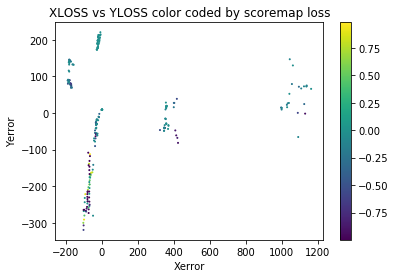

In [15]:
plt.scatter(xloss,yloss,c=scloss,s=1)
plt.colorbar()
plt.title('XLOSS vs YLOSS color coded by scoremap loss')
plt.xlabel('Xerror')
plt.ylabel('Yerror')
plt.savefig('Comparison_loss.png')
plt.show()

In [10]:
frame_num,ny,nx,num_joints = scmap.shape
    
#Combine scoremat and offsets to the final pose.
LOCREF=locref.reshape(frame_num,ny*nx,num_joints,2)
#num_joints=27
LOCREF=locref.reshape(frame_num,ny*nx,num_joints,2) 
DZ=np.zeros((frame_num,num_joints,nx*ny,3))
X,Y=np.unravel_index(a,dims=(nx,ny))
fxmap=[]
fymap=[]
fsmap=[]
for j in range(frame_num):
    xmap=[] 
    ymap=[]
    smap=[]
    for k in range(num_joints):
        DZ[j,k,:,0]=LOCREF[j,:,k,0]
        DZ[j,k,:,1]=LOCREF[j,:,k,1]
        DZ[j,k,:-1,2]=scmap[j,Y[j,k,:],X[j,k,:],k]
        #set_trace()
        X_=X[j,k,:].astype('float32')*8.0+.5*8.0+DZ[j,k,:-1,0]
        Y_=Y[j,k,:].astype('float32')*8.0+.5*8.0+DZ[j,k,:1,1]
        xmap.append(X_)
        ymap.append(Y_)
        smap.append(DZ[j,k,:,2])
    fsmap.append(smap)
    fxmap.append(xmap)
    fymap.append(ymap)
xarray=np.array(fxmap)
yarray=np.array(fymap)
sarray=np.array(fsmap)
#stride is 8 inside deeplabcut
# we also use getpose()
# match these to .h5 iterable repo2 

In [18]:
print(np.amax(xarray),
    np.amin(xarray),
      np.amax(yarray),
      np.amin(yarray))

1547.007453918457 -12.668704986572266 512.1038265228271 -2.027315139770508


In [30]:
1547+12
576+50


626

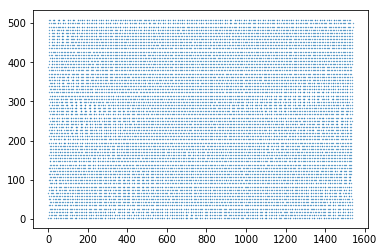

In [11]:
plt.scatter(xarray[1,2,:],yarray[1,2,:],s=.1)
plt.savefig('pixel_reps_nostretch.png')
plt.show()

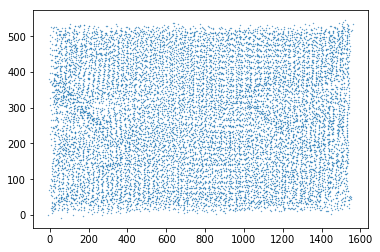

In [77]:
plt.scatter(xarray[1,2,:],yarray[1,2,:],s=.1)
plt.savefig('pixel_reps_stretch.png')
plt.show()

In [5]:
import scipy
def interpolate_map(xarray,yarray,sarray,digit_num,pix_size):
    xarray=xarray[digit_num,:]
    yarray=yarray[digit_num,:]
    sarray=sarray[digit_num,:]
    x_new = np.linspace(np.amin(xarray), np.amax(xarray), pix_size*3)#pixelsize*3
    y_new = np.linspace(np.amin(yarray), np.amax(yarray), pix_size)

    f_scipy = interpolate.interp2d(xarray, yarray, sarray, kind='cubic')

    z_scipy = f_scipy(x_new, y_new)
    return z_scipy

In [3]:
zed=interpolate_map(xarray,yarray,sarray,1,608/8)


/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=39,40 m=12288 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


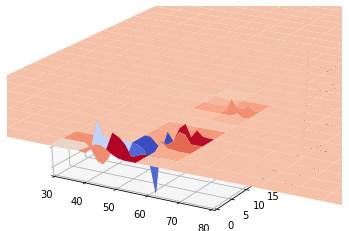

In [25]:
x_new = np.linspace(np.amin(np.ravel(xarray)), np.amax(np.ravel(xarray)), 608*3)#pixelsize*3
y_new = np.linspace(np.amin(np.ravel(yarray)), np.amax(np.ravel(yarray)), 608)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_new, y_new)
tri = mtri.Triangulation(X.flatten(), Y.flatten())

surf = ax.plot_surface(X, Y, zed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
#plt.show()
#ax.plot_trisurf(X.flatten(),Y.flatten(),zed.flatten(), triangles=tri.triangles, cmap=plt.cm.Spectral)
#ax.set_zlim(-10, 10)
ax.set_ylim(0,30)
ax.set_xlim(30,80)
plt.savefig('tryit.png')
plt.show()


In [11]:
# playing around with the score values
xarray.shape
sarray.shape

(259, 27, 12288)

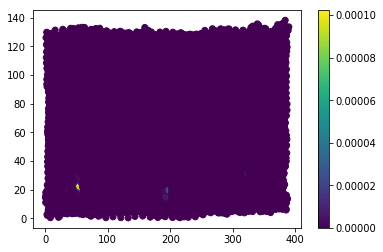

In [46]:
#ax = plt.figure()
#plt.pcolormesh(xarray[1,1,:],yarray[1,1,:],sarray[1,1,:])
s = plt.scatter(xarray[2,1,:],yarray[2,1,:],c=sarray[1,1,:])
plt.colorbar(s)
plt.plot()
plt.savefig('noninterpolated_digit.png')

Traceback (most recent call last):
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: animate() missing 1 required positional argument: 'i'


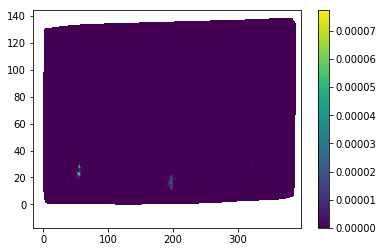

In [29]:
import matplotlib.pylab as plt
from matplotlib import animation

fig = plt.figure()

#plt.hold(True)
xi = np.linspace(np.amin(np.ravel(xarray)), np.amax(np.ravel(xarray)), 608*3)#pixelsize*3
yi = np.linspace(np.amin(np.ravel(yarray)), np.amax(np.ravel(yarray)), 608)

X,Y=np.meshgrid(xi,yi)
Z_=scipy.interpolate.griddata((xarray[0,1,:],yarray[0,1,:]),sarray[0,1,:],(X,Y),method='linear')
#We need to prime the pump, so to speak and create a quadmesh for plt to work with
plt.pcolormesh(X, Y,Z_)
plt.colorbar()
def animate(self, i):
    Z=scipy.interpolate.griddata((xarray[i,1,:],yarray[i,1,:]),sarray[i,1,:],(X,Y),method='linear')
    plt.pcolormesh(X,Y,Z)
    plt.colorbar()
anim = animation.FuncAnimation(fig, animate, frames = range(0,259), blit = True)

plt.show()
#plt.hold(False)
########leftovers ########
xi = np.linspace(np.amin(np.ravel(xarray)), np.amax(np.ravel(xarray)), 608*3)#pixelsize*3
yi = np.linspace(np.amin(np.ravel(yarray)), np.amax(np.ravel(yarray)), 608)
    #xi=np.linspace(0,608*3,608*3)
    #yi=np.linspace(0,608,608)
X,Y=np.meshgrid(xi,yi)
Z_=scipy.interpolate.griddata((xarray[0,1,:],yarray[0,1,:]),sarray[0,1,:],(X,Y),method='linear')
#We need to prime the pump, so to speak and create a quadmesh for plt to work with
plt.pcolormesh(X, Y,Z_)

Traceback (most recent call last):
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/matplotlib/animation.py", line 1536, in _init_draw
    artist.set_visible(False)
  File "<ipython-input-85-08702a9f343a>", line 18, in setvisible
    for c in self.collections: c.set_visible(vis)
AttributeError: 'QuadMesh' object has no attribute 'collections'


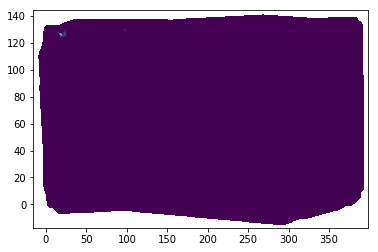

In [85]:
### Movie for joints using imshow
import matplotlib.animation as animation
import pylab as pl
import types
fig = pl.figure()
cmap = plt.get_cmap('Spectral')
ims = []


for i in range(0,259):
    t_step = int(i)
    Z=scipy.interpolate.griddata((xarray[i,1,:],yarray[i,1,:]),sarray[i,1,:],(X,Y),method='linear')
    #Z=scipy.interpolate.griddata((xarray,yarray),zarray,(X,Y),method='linear')
    #plt.pcolormesh(X,Y,Z)
    #plt.colorbar()
    im = plt.pcolormesh(X,Y,Z)
    def setvisible(self,vis):
        for c in self.collections: c.set_visible(vis)
    def setanimated(self,ani):
        for c in self.collections: c.set_animated(ani)
    def getfigure(self,ani):
        for c in self.collections:c.get_figure(ani)
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    #im.get_figure = types.MethodType(getfigure,im)
    im.axes = pl.gca()
    im.figure=fig
    #im,=ax1.plot_heatmap(xarray[i,1,:],yarray[i,1,:],sarray[i,1,:])
    ims.append([im])
    plt.plot() 
    #plt.close()
interval = .05#in seconds     
ani = animation.ArtistAnimation(fig, ims, interval=70, blit=False,repeat_delay=1000)

plt.show()

#plt.colorbar()
#plt.show()
# change a to indices over a movie etc
#ani.save('movie_interp_.mp4')

KeyboardInterrupt: 

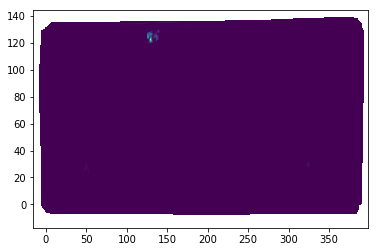

In [70]:
xi = np.linspace(np.amin(np.ravel(xarray)), np.amax(np.ravel(xarray)), 608*3)#pixelsize*3
yi = np.linspace(np.amin(np.ravel(yarray)), np.amax(np.ravel(yarray)), 608)
X,Y=np.meshgrid(xi,yi)

for i in range(num_joints):
    Z=scipy.interpolate.griddata((xarray[1,i,:],yarray[1,i,:]),sarray[1,i,:],(X,Y),method='linear')
    plt.pcolormesh(X,Y,Z)
    #plt.colorbar()
    plt.plot()
    
#plot_heatmap(xarray[2,1,:],yarray[2,1,:],sarray[2,1,:])
plt.colorbar()
plt.savefig('alldigits_rep.png')
plt.show()

In [69]:
def plot_heatmap(xarray,yarray,zarray):
    xi = np.linspace(np.amin(np.ravel(xarray)), np.amax(np.ravel(xarray)), 608*3)#pixelsize*3
    yi = np.linspace(np.amin(np.ravel(yarray)), np.amax(np.ravel(yarray)), 608)
    X,Y=np.meshgrid(xi,yi)
    Z=scipy.interpolate.griddata((xarray,yarray),zarray,(X,Y),method='linear')
    #plt.pcolormesh(X,Y,Z)
    #plt.colorbar()
    plt.contourf(X,Y,Z)
    plt.plot()
    
    #ax = fig.add_subplot(111)
    
    #plt.plot(xarray,yarray,'k.')
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    
    #plt.savefig('interpolated_ex.png')
    #plt.show()
    

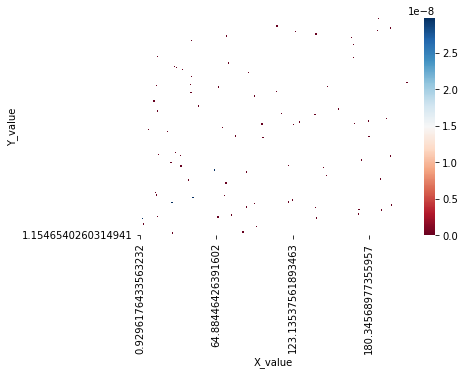

--Call--
> /home/kallanved/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/IPython/core/displayhook.py(248)__call__()
    246         sys.stdout.flush()
    247 
--> 248     def __call__(self, result=None):
    249         """Printing with history cache management.
    250 

--KeyboardInterrupt--
ipdb> exit


BdbQuit: 

In [14]:
# First version here


    #xplot=xarray[1,:]
    #yplot=yarray[i,:]
    
    #z=sarray[i,:]
    
df = pd.DataFrame.from_dict(np.array([xarray[1,1,:],yarray[1,1,:],sarray[1,1,:]]).T)
df.columns = ['X_value','Y_value','Z_value']
df['Z_value'] = pd.to_numeric(df['Z_value'])
    
    
    
    
    
    
    
    
    
pivotted= df.pivot('Y_value','X_value','Z_value')
sns.heatmap(pivotted,cmap='RdBu',robust=True)
plt.xlim(0,1600)
plt.ylim(0,500)
plt.show()
set_trace()
